### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
from sklearn import metrics
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



In [2]:
data = pd.read_csv('vehicle.csv') 
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
data.shape

(846, 19)

In [4]:
# sample of data to drop if any missing values are there
data.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [5]:
#drop Na values
new_data = data.dropna() 


In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

In [7]:
new_data['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

Since the variable is categorical, you can use value_counts function

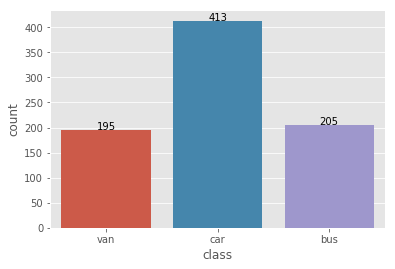

In [8]:
# seaborn for statistical plot 
import seaborn as sns
ax = sns.countplot(x="class", data=new_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,'{0:0}'.format(height),ha="center") 

### Check for any missing values in the data 

In [9]:
print("Total missing values in database is = " + str(new_data.isnull().sum().sum()))

Total missing values in database is = 0


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [10]:
new_data1=new_data.drop(columns=['class'])


In [11]:

new_data1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [ ]:
new_data1=new_dat

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [12]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(new_data1)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [13]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2.917617e+07
1,2,6.905477e+06
2,3,4.610991e+06
3,4,3.333100e+06
4,5,2.288297e+06
5,6,1.823916e+06
6,7,1.643534e+06
7,8,1.466415e+06
8,9,1.308577e+06


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

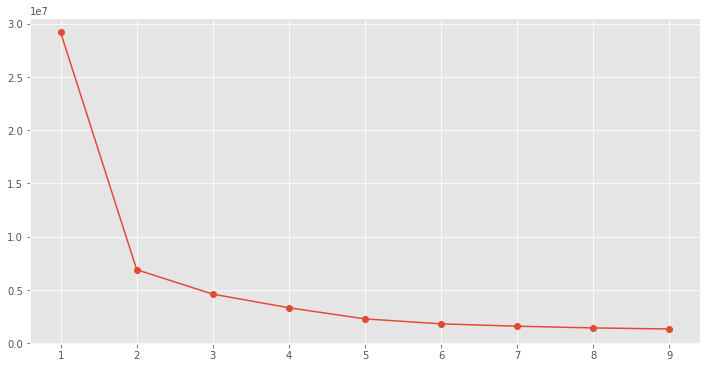

In [14]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

 the elbow is forming at K=3. So the optimal value will be 3 for performing K-Means.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [15]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(new_data1)
# Getting the cluster labels
labels = kmeans.predict(new_data1)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print(centroids) # From sci-kit learn

Centroid values
[[ 88.32403433  41.20600858  71.18240343 146.61587983  60.46566524
    7.96351931 144.26824034  46.75751073  18.70171674 140.2639485
  166.01072961 310.31330472 157.11802575  73.39914163   6.07939914
   10.91201717 187.91630901 193.98283262]
 [104.15920398  53.0199005  102.81094527 202.02985075  62.10447761
    9.82089552 217.23383085  30.70646766  24.40298507 166.37313433
  230.07462687 700.87064677 213.72636816  72.45771144   7.30845771
   15.90547264 188.         196.43283582]
 [ 96.21917808  44.97260274  88.11643836 195.52054795  65.5
    8.94520548 179.10273973  36.73287671  21.19178082 146.79452055
  202.3630137  485.78082192 174.59589041  69.13013699   5.90410959
   13.92465753 193.71917808 200.33561644]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [16]:
centroid_df = pd.DataFrame(centroids, columns = list(new_data1) )


In [17]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,88.324034,41.206009,71.182403,146.615880,60.465665,7.963519,144.268240,46.757511,18.701717,140.263948,166.010730,310.313305,157.118026,73.399142,6.079399,10.912017,187.916309,193.982833
1,104.159204,53.019900,102.810945,202.029851,62.104478,9.820896,217.233831,30.706468,24.402985,166.373134,230.074627,700.870647,213.726368,72.457711,7.308458,15.905473,188.000000,196.432836
2,96.219178,44.972603,88.116438,195.520548,65.500000,8.945205,179.102740,36.732877,21.191781,146.794521,202.363014,485.780822,174.595890,69.130137,5.904110,13.924658,193.719178,200.335616


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [18]:
labels = kmeans.labels_
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [19]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [20]:
arr=np.vstack((a,b,c))
df_1=pd.DataFrame(arr)

In [21]:
df_1.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

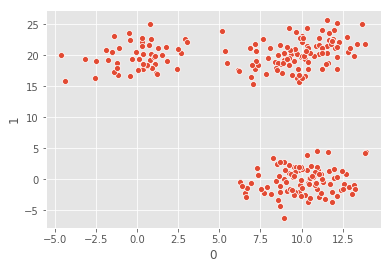

In [22]:
sns.scatterplot(x= df_1[0], y = df_1[1] )

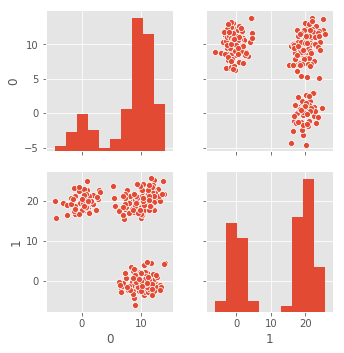

In [23]:
sns.pairplot(df_1);

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [24]:
import scipy.cluster.hierarchy 

linkage=scipy.cluster.hierarchy.linkage(df_1, method='ward', metric='euclidean')

In [25]:
linkage

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

### 12. Plot the dendrogram for the consolidated dataframe

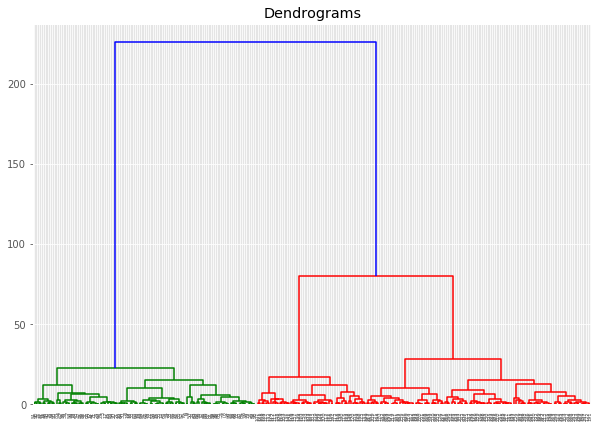

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_1, method='ward'))

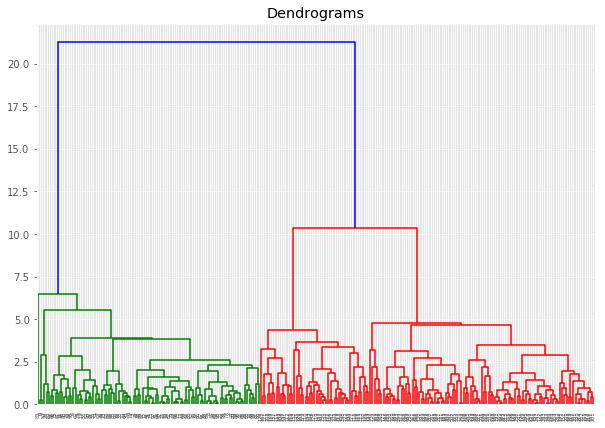

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_1, method='average'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

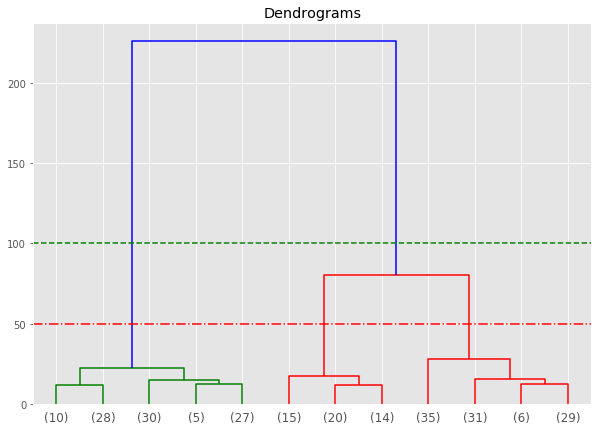

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_1, method='ward'),truncate_mode='lastp',p=12)
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=50, color='r', linestyle='-.')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [29]:
from scipy.cluster.hierarchy import fcluster
max_d = 12
clusters_1 = fcluster(linkage,max_d,criterion = 'distance')
clusters_1

array([ 3,  2,  4,  1,  1,  4,  4,  1,  2,  3,  2,  1,  1,  2,  2,  2,  4,
        1,  2,  2,  1,  1,  2,  1,  3,  1,  4,  2,  1,  1,  2,  1,  2,  2,
        1,  4,  1,  4,  2,  1,  1,  1,  2,  1,  4,  1,  4,  1,  1,  4,  3,
        1,  4,  1,  1,  2,  1,  2,  2,  4,  4,  2,  1,  2,  2,  4,  2,  4,
        4,  2,  2,  1,  4,  2,  1,  1,  2,  4,  1,  4,  2,  1,  4,  1,  4,
        1,  2,  4,  4,  3,  1,  4,  2,  2,  1,  1,  4,  1,  4,  4,  6,  5,
        6,  6,  5,  6,  5,  6,  5,  6,  6,  5,  5,  6,  5,  6,  6,  6,  6,
        6,  6,  5,  6,  6,  5,  6,  6,  5,  5,  6,  6,  6,  5,  6,  6,  5,
        6,  6,  6,  6,  6,  5,  6,  6,  6,  6,  6,  9,  5,  6,  8,  7,  7,
       10,  8, 10,  8,  7, 10, 10, 10,  8,  7,  8,  8,  7,  9, 10,  7,  8,
        7,  7, 10,  7, 10,  8,  7,  8,  7, 10, 10,  8,  7, 10, 10,  8, 10,
        8,  8,  8,  7, 10, 10,  7,  7,  8,  9,  8,  8,  7,  7,  7,  8,  9,
       10,  7,  7,  8,  8,  7,  8,  8, 10, 10,  7, 10,  8,  7,  7,  7,  7,
        7,  8, 10, 10,  8

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 